<a href="https://colab.research.google.com/github/spentaur/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/module4-sequence-your-narrative/LS_DS_124_Sequence_your_narrative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Sequence your narrative

Today we will create a sequence of visualizations inspired by [Hans Rosling's 200 Countries, 200 Years, 4 Minutes](https://www.youtube.com/watch?v=jbkSRLYSojo).

Using this [data from Gapminder](https://github.com/open-numbers/ddf--gapminder--systema_globalis/):
- [Income Per Person (GDP Per Capital, Inflation Adjusted) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv)
- [Life Expectancy (in Years) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv)
- [Population Totals, by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Entities](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv)
- [Concepts](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv)

Objectives
- sequence multiple visualizations
- combine qualitative anecdotes with quantitative aggregates

Links
- [Hans Rosling’s TED talks](https://www.ted.com/speakers/hans_rosling)
- [Spiralling global temperatures from 1850-2016](https://twitter.com/ed_hawkins/status/729753441459945474)
- "[The Pudding](https://pudding.cool/) explains ideas debated in culture with visual essays."
- [A Data Point Walks Into a Bar](https://lisacharlotterost.github.io/2016/12/27/datapoint-in-bar/): a thoughtful blog post about emotion and empathy in data storytelling

## Make a plan

#### How to present the data?

Variables --> Visual Encodings
- Income --> x
- Lifespan --> y
- Region --> color
- Population --> size
- Year --> animation frame (alternative: small multiple)
- Country --> annotation

Qualitative --> Verbal
- Editorial / contextual explanation --> audio narration (alternative: text)


#### How to structure the data?

| Year | Country | Region   | Income | Lifespan | Population |
|------|---------|----------|--------|----------|------------|
| 1818 | USA     | Americas | ###    | ##       | #          |
| 1918 | USA     | Americas | ####   | ###      | ##         |
| 2018 | USA     | Americas | #####  | ###      | ###        |
| 1818 | China   | Asia     | #      | #        | #          |
| 1918 | China   | Asia     | ##     | ##       | ###        |
| 2018 | China   | Asia     | ###    | ###      | #####      |


## More imports

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns

In [0]:
def start():
    options = {
        'display': {
            'max_columns': None,
            'max_colwidth': 25,
            'expand_frame_repr': False,  # Don't wrap to multiple pages
            'max_rows': 25,
            'max_seq_items': 50,         # Max length of printed sequence
            'precision': 4,
            'show_dimensions': False
        },
        'mode': {
            'chained_assignment': None   # Controls SettingWithCopyWarning
        }
    }
    for category, option in options.items():
        for op, value in option.items():
            pd.set_option(f'{category}.{op}', value)  # Python 3.6+
start()

## Load & look at data

In [0]:
income = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv')

In [0]:
lifespan = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv')

In [0]:
population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

In [0]:
entities = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')

In [0]:
concepts = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv')

In [0]:
income.shape, lifespan.shape, population.shape, entities.shape, concepts.shape

((46513, 3), (44370, 3), (59297, 3), (273, 33), (590, 16))

In [0]:
income.loc[(income['geo'] == 'alb') & (income['time'] == 1862)]


,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted
544,alb,1862,736


In [0]:
lifespan.loc[(lifespan['geo'] == 'alb') & (lifespan['time'] == 1862)]


,geo,time,life_expectancy_years
729,alb,1862,35.4


In [0]:
population.loc[(population['geo'] == 'alb') & (population['time'] == 1862)]


,geo,time,population_total
664,alb,1862,563821


In [0]:
pd.options.display.max_columns = 500
entities[['country', 'world_4region']].head()

,country,world_4region
0,abkh,europe
1,abw,americas
2,afg,asia
3,ago,africa
4,aia,americas


In [0]:
concepts.head()

,concept,color,concept_type,description,description_long,domain,drill_up,indicator_url,name,name_catalog,name_short,scales,source,source_long,source_url,tags
0,adults_with_hiv_perce...,NaN,measure,The estimated percent...,NaN,NaN,NaN,NaN,"Adults with HIV (%, a...","Adults with HIV (%, a...",Adults with HIV,"[""log"", ""linear""]",NaN,NaN,https://www.gapminder...,hiv
1,age_at_1st_marriage_w...,NaN,measure,"The mean age, in year...",NaN,NaN,NaN,NaN,Age at 1st marriage (...,Age at 1st marriage (...,Age at 1st marriage,"[""linear"", ""log""]",NaN,NaN,https://www.gapminder...,population
2,aged_15_24_employment...,NaN,measure,Percentage of total p...,NaN,NaN,NaN,NaN,Aged 15-24 employment...,Aged 15-24,Employment rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/i...,employment_rate
3,aged_15_24_unemployme...,NaN,measure,Percentage of total p...,NaN,NaN,NaN,NaN,Aged 15-24 unemployme...,Aged 15-24,Unemployment rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/i...,unemployment
4,aged_15_64_labour_for...,NaN,measure,"For age group 15-64, ...",NaN,NaN,NaN,NaN,Aged 15-64 labour for...,Aged 15-64,Labour force particip...,"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/i...,labour_force_particip...


## Merge data

https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf

In [0]:
"""
    Income --> x
    Lifespan --> y
    Region --> color
    Population --> size
    Year --> animation frame (alternative: small multiple)
    Country --> annotation
"""

df = (income
          .merge(lifespan)
          .merge(population)
          .merge(entities[['country', 'name', 'world_6region']], left_on="geo", right_on="country"))

df.drop(columns=['geo', 'country'], inplace=True)
df.rename(columns={
    'time': 'Year',
    'income_per_person_gdppercapita_ppp_inflation_adjusted': 'Income',
    'life_expectancy_years': 'Lifespan',
    'population_total': 'Population',
    'world_6region': 'Region',
    'name': 'Country'
}, inplace=True)

df = df[['Year', 'Country', 'Region', 'Income', 'Lifespan', 'Population']]

df['Region'] = df['Region'].str.replace('_', ' ').str.title()

df.head()



,Year,Country,Region,Income,Lifespan,Population
0,1800,Afghanistan,South Asia,603,28.21,3280000
1,1801,Afghanistan,South Asia,603,28.20,3280000
2,1802,Afghanistan,South Asia,603,28.19,3280000
3,1803,Afghanistan,South Asia,603,28.18,3280000
4,1804,Afghanistan,South Asia,603,28.17,3280000


## Explore data

In [0]:
df.describe()

,Year,Income,Lifespan,Population
count,40437.0000,40437.0000,40437.0000,4.0437e+04
mean,1909.2929,4619.4927,43.1321,1.3712e+07
std,63.3087,10209.5710,16.3132,6.6063e+07
min,1800.0000,247.0000,1.0000,2.1280e+03
25%,1854.0000,876.0000,31.1600,4.1133e+05
50%,1909.0000,1442.0000,35.5000,1.9860e+06
75%,1964.0000,3488.0000,55.9700,6.4997e+06
max,2018.0000,177522.0000,84.1700,1.4150e+09


In [0]:
df.describe(exclude='number')

,Country,Region
count,40437,40437
unique,187,6
top,Qatar,Europe Central Asia
freq,219,10778


In [0]:
usa = df[df['Country'] == 'United States']
usa

,Year,Country,Region,Income,Lifespan,Population
38028,1800,United States,America,2127,39.41,6801854
38029,1801,United States,America,2167,39.41,6933517
38030,1802,United States,America,2202,39.41,7067728
38031,1803,United States,America,2166,39.41,7204538
38032,1804,United States,America,2165,39.41,7343995
38033,1805,United States,America,2209,39.41,7486152
38034,1806,United States,America,2251,39.41,7631061
38035,1807,United States,America,2273,39.41,7778775
38036,1808,United States,America,2113,39.41,7929348
38037,1809,United States,America,2217,39.41,8082836


## Plot visualization

In [0]:
now = df[df['Year'] == 2018]

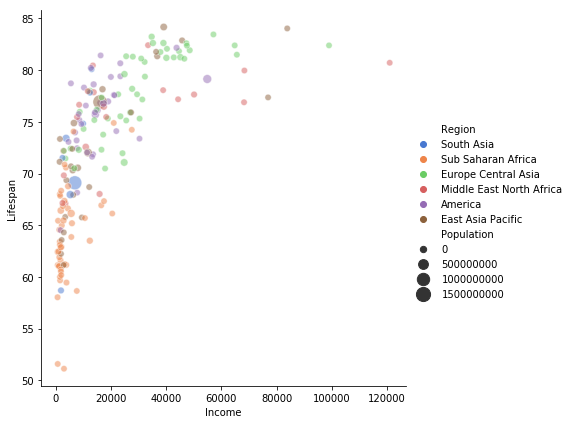

In [0]:
"""
    Income --> x
    Lifespan --> y
    Region --> color
    Population --> size
    Year --> animation frame (alternative: small multiple)
    Country --> annotation
"""

sns.relplot(x="Income", y="Lifespan", hue="Region", size="Population",
            sizes=(40, 200), alpha=.5, palette="muted",
            height=6, data=now)

## Analyze outliers

In [0]:
now[now['Income'] > 80000].sort_values(by="Income", ascending=False)

,Year,Country,Region,Income,Lifespan,Population
30362,2018,Qatar,Middle East North Africa,121033,80.71,2694849
22212,2018,Luxembourg,Europe Central Asia,99034,82.39,590321
31895,2018,Singapore,East Asia Pacific,83888,84.03,5791901


In [0]:
qatar = now[now['Country'] == 'Qatar']
qatar_income = qatar['Income'].values[0]
qatar_lifespan = qatar['Lifespan'].values[0]

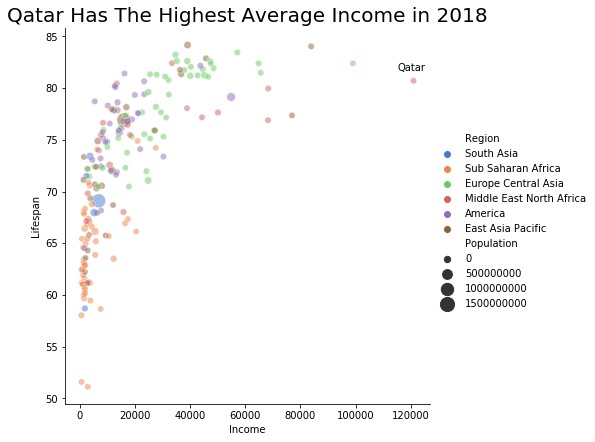

In [0]:
sns.relplot(x="Income", y="Lifespan", hue="Region", size="Population",
            sizes=(40, 200), alpha=.5, palette="muted",
            height=6, data=now)

plt.title('Qatar Has The Highest Average Income in 2018', fontdict={'fontsize': 20})
plt.text(qatar_income-6000, qatar_lifespan+1, "Qatar")

plt.show()

## Plot multiple years

In [0]:
centuries = df[df['Year'].isin([1818,1918,2018])]
maxes = centuries.max()
mins = centuries.min()
xoffset = (maxes['Income'] * .06)
yoffset = (maxes['Lifespan'] * .06)
xlim=(xoffset*-1, maxes['Income']+xoffset)
ylim=(yoffset*-1, maxes['Lifespan']+yoffset)
years = centuries['Year'].unique()
all_years = df['Year'].sort_values().unique()

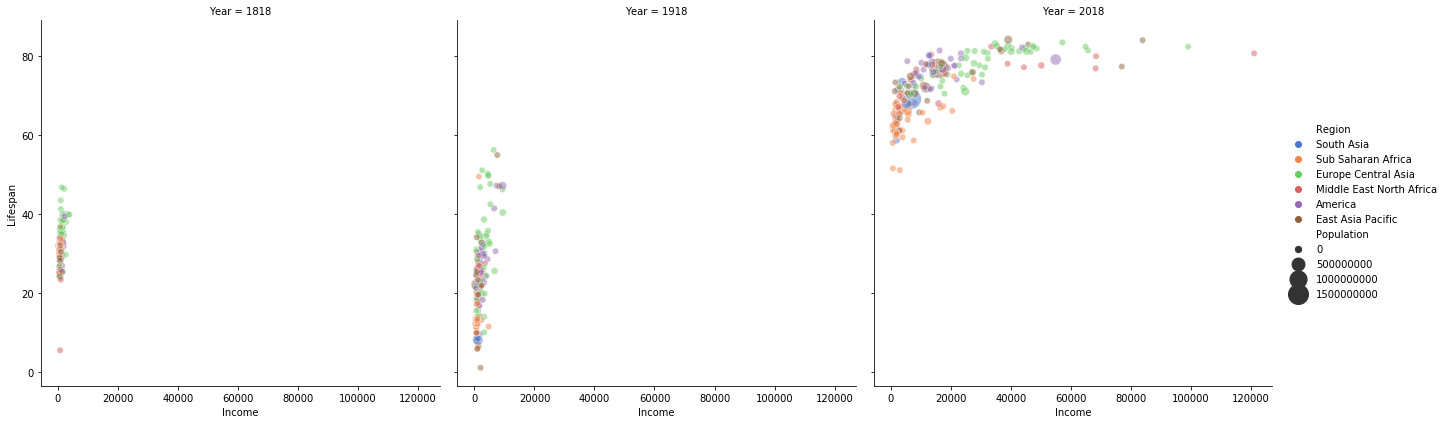

In [0]:
sns.relplot(x="Income", y="Lifespan", hue="Region", size="Population",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=centuries, col="Year");

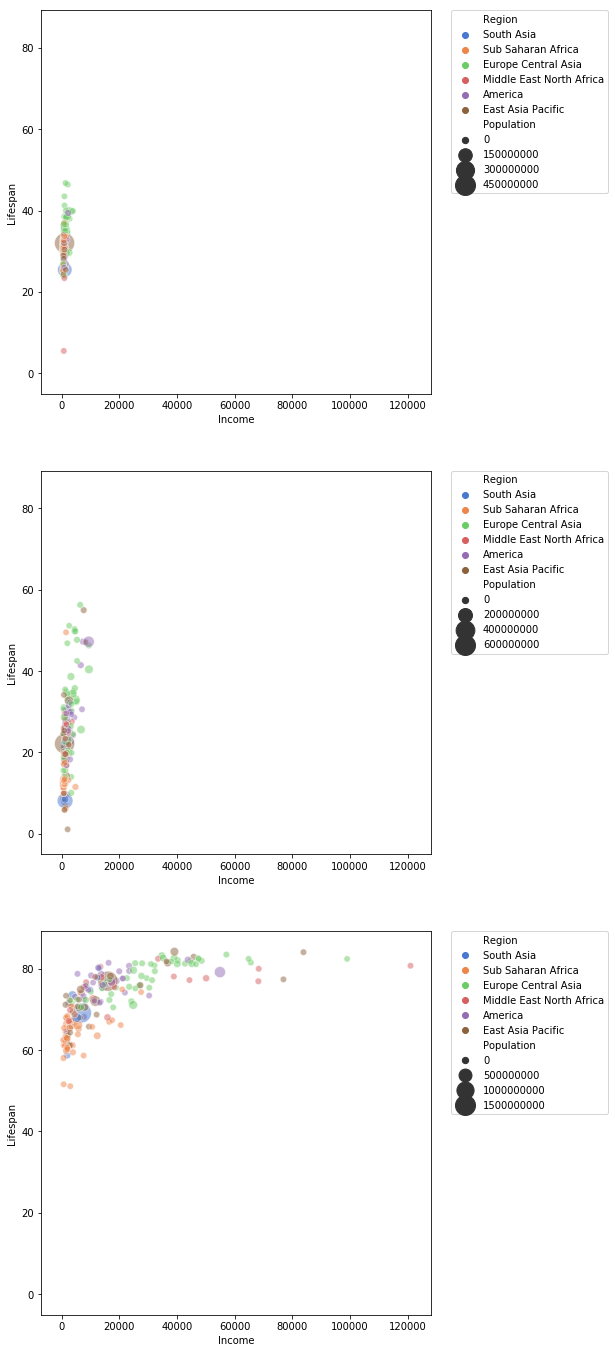

In [0]:
fig, ax = plt.subplots(3,1, figsize=(7,24))

for idx,year in enumerate(years):
    g = sns.scatterplot(x="Income", y="Lifespan", hue="Region", size="Population",
            sizes=(40, 400), alpha=.5, palette="muted",
            data=centuries.loc[centuries['Year'] == year], ax=ax[idx])
    g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    g.set(xlim=xlim, ylim=ylim)
    
plt.show()

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.animation as animation
%matplotlib inline
from IPython.display import HTML

In [0]:
# %%sh
# wget https://github.com/google/fonts/raw/master/apache/roboto/Roboto-Thin.ttf
# wget https://github.com/google/fonts/raw/master/apache/roboto/Roboto-Bold.ttf
# wget https://github.com/chrissimpkins/codeface/raw/master/fonts/cutive-mono/CutiveMono-Regular.ttf
# mv /content/*.ttf /usr/share/fonts/truetype/
# sudo fc-cache -fv
# sudo rm -fr /root/.cache/matplotlib

In [0]:
!fc-list

/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf: Liberation Sans Narrow:style=Italic
/usr/share/fonts/type1/gsfonts/n021024l.pfb: Nimbus Roman No9 L:style=Medium Italic
/usr/share/fonts/type1/gsfonts/n021004l.pfb: Nimbus Roman No9 L:style=Medium
/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf: Liberation Sans:style=Regular
/usr/share/fonts/type1/gsfonts/p052023l.pfb: URW Palladio L:style=Italic
/usr/share/fonts/type1/gsfonts/n022003l.pfb: Nimbus Mono L:style=Regular
/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf: Liberation Mono:style=Bold Italic
/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf: Liberation Serif:style=Italic
/usr/share/fonts/type1/gsfonts/z003034l.pfb: URW Chancery L:style=Medium Italic
/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf: Liberation Mono:style=Bold
/usr/share/fonts/type1/gsfonts/c059013l.pfb: Century Schoolbook L:style=Roman
/usr/share/fonts/truetype/liberation/LiberationS

In [0]:
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Roboto'
plt.rcParams['font.monospace'] = 'Cutive Mono'

In [0]:
import matplotlib.cm as cm
regions = list(df['Region'].unique())
colors = ('tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown')
colors = dict(zip(regions, colors))
colors

{'America': 'tab:purple',
 'East Asia Pacific': 'tab:brown',
 'Europe Central Asia': 'tab:green',
 'Middle East North Africa': 'tab:red',
 'South Asia': 'tab:blue',
 'Sub Saharan Africa': 'tab:orange'}

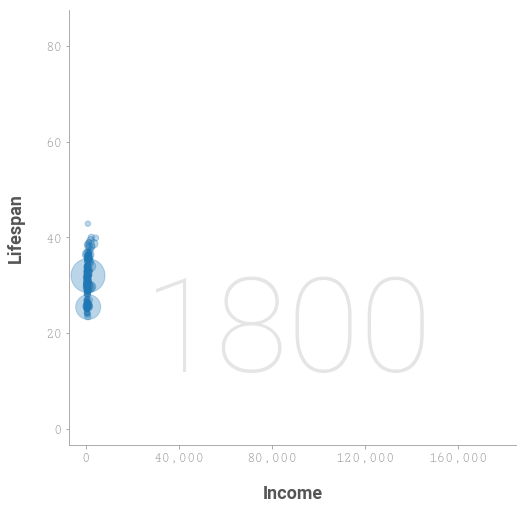

In [0]:
def normalize(values, bounds):
    """
    https://stackoverflow.com/questions/48109228/normalizing-data-to-certain-range-of-values
    """
    return [bounds['desired']['lower'] + (x - bounds['actual']['lower']) * 
            (bounds['desired']['upper'] - bounds['desired']['lower']) / 
            (bounds['actual']['upper'] - bounds['actual']['lower']) 
            for x in values]

def animate(i):
    """
    this is the main function that actually does the animation.
    what it's doing is every frame (i), it's resetting the data (sc.set_offsets)
    the new data is get the x,y columns from df where year is years[i].
    so the first one would be years[0] == 1990, then years[1] == 1991, and so on.
    i'm also changing the text in this function as well.
    """
    curr_year = all_years[i]
    year_text.set_text(curr_year)
    data = df[['Income', 'Lifespan', 'Population', 'Region']].loc[df['Year'] == curr_year]
    sc.set_offsets(data[['Income', 'Lifespan']])
    sizes = normalize(
    data['Population'].to_list(),
    {'actual': {'lower': df['Population'].min(), 'upper': df['Population']
                .max()}, 'desired': {'lower': 30, 'upper': 5000}})
    sc.set_sizes(sizes)



# this stuff is just standard matplotlib stuff
fig, ax = plt.subplots(figsize=(8,8))
ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#999999')
ax.spines['bottom'].set_color('#999999')

# making the initial plot empty
x, y = [], []
sc = ax.scatter(x,y, alpha=0.3)
    

# making sure that the limits stay the same
maxes = df.max()
mins = df.min()
xoffset = (maxes['Income'] * .04)
yoffset = (maxes['Lifespan'] * .04)
xlim=(xoffset*-1, maxes['Income']+xoffset)
ylim=(yoffset*-1, maxes['Lifespan']+yoffset)
ax.set(xlim=xlim, ylim=ylim)

plt.yticks(fontsize=14, color="#999999", fontfamily="monospace")
plt.xticks(np.arange(0,maxes['Income'],40000), 
           ["{:,}".format(n) for n in np.arange(0,maxes['Income'],40000)], 
           fontsize=14, color="#999999", fontfamily="monospace")

ax.tick_params(axis='both', colors='#999999')

# set the labels
ax.set_xlabel('Income', fontsize=18, labelpad=20, fontweight="bold", 
              color="#555555", fontfamily="sans-serif")
ax.set_ylabel('Lifespan', fontsize=18, labelpad=20, fontweight="bold",
              color="#555555", fontfamily="sans-serif")

# this is setting the initial text to be empty as well
year_text = ax.text(25000,12, '', fontsize=132, alpha=.1, fontfamily="sans-serif")

# this is calling that animation function
# the number of frames is the number of years
# the interval is how long between frames in ms
ani = animation.FuncAnimation(fig, animate, 
                frames=len(all_years), interval=100, repeat=True) 

ani.save('funcanimation.gif', writer='imagemagick')
HTML(ani.to_html5_video())

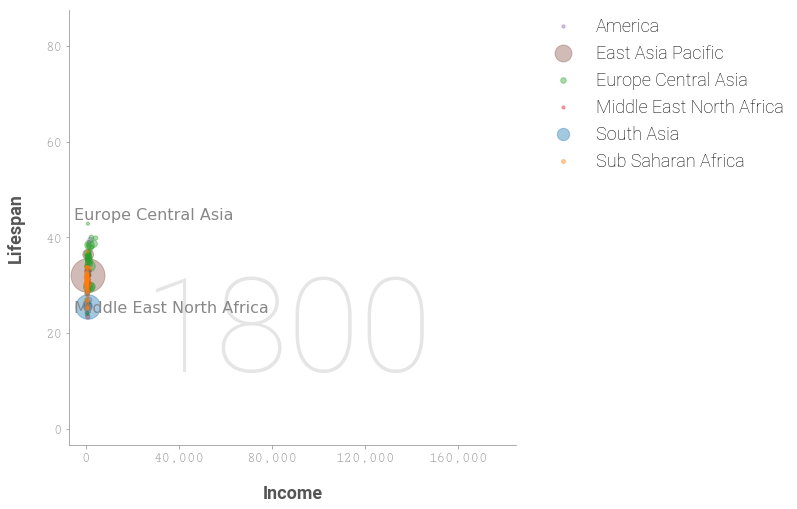

In [0]:
def animate(i):
    """
    this is the main function that actually does the animation.
    what it's doing is every frame (i), it's resetting the data (sc.set_offsets)
    the new data is get the x,y columns from df where year is years[i].
    so the first one would be years[0] == 1990, then years[1] == 1991, and so on.
    i'm also changing the text in this function as well.
    """
    curr_year = all_years[i]
    year_text.set_text(curr_year)
    data = df[['Income', 'Lifespan', 'Population', 'Region']].loc[df['Year'] == curr_year]
    sc.set_offsets(data[['Income', 'Lifespan']])
    sizes = normalize(
    data['Population'].to_list(),
    {'actual': {'lower': df['Population'].min(), 'upper': df['Population']
                .max()}, 'desired': {'lower': 30, 'upper': 5000}})
    sc.set_sizes(sizes)

countries_always = ['United States', 'China', 'Russia']

# the countires with the longest lifespan and the highest income for the past 5
# years.


# the countires with the lowest lifespan and the lowest income for the past 5
# years.


for year in all_years:
    
    data = df.loc[df['Year'] == year]

    lowest_lifespan = data.nsmallest(1, 'Lifespan')
    longest_lifespan = data.nlargest(1, 'Lifespan')

    regions = []

    regions.append((longest_lifespan['Income'].values[0], longest_lifespan['Lifespan'].values[0], longest_lifespan['Region'].values[0]))
    regions.append((lowest_lifespan['Income'].values[0], lowest_lifespan['Lifespan'].values[0], lowest_lifespan['Region'].values[0]))


    # this stuff is just standard matplotlib stuff
    fig, ax = plt.subplots(figsize=(8,8))
    ax.grid(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color('#999999')
    ax.spines['bottom'].set_color('#999999')

    # making the initial plot empty
    x, y = [], []
    sc = ax.scatter(x,y, alpha=0.3)


    # making sure that the limits stay the same
    maxes = df.max()
    mins = df.min()
    xoffset = (maxes['Income'] * .04)
    yoffset = (maxes['Lifespan'] * .04)
    xlim=(xoffset*-1, maxes['Income']+xoffset)
    ylim=(yoffset*-1, maxes['Lifespan']+yoffset)
    ax.set(xlim=xlim, ylim=ylim)

    plt.yticks(fontsize=14, color="#999999", fontfamily="monospace")
    plt.xticks(np.arange(0,maxes['Income'],40000), 
            ["{:,}".format(n) for n in np.arange(0,maxes['Income'],40000)], 
            fontsize=14, color="#999999", fontfamily="monospace")

    ax.tick_params(axis='both', colors='#999999')

    # set the labels
    ax.set_xlabel('Income', fontsize=18, labelpad=20, fontweight="bold", 
                color="#555555", fontfamily="sans-serif")
    ax.set_ylabel('Lifespan', fontsize=18, labelpad=20, fontweight="bold",
                color="#555555", fontfamily="sans-serif")

    # this is setting the initial text to be empty as well
    year_text = ax.text(25000,12, year, fontsize=132, alpha=.1, fontfamily="sans-serif")
    for key, group in df.loc[df['Year'] == year].groupby('Region'):
        sizes = normalize(
        group['Population'].to_list(),
        {'actual': {'lower': df['Population'].min(), 'upper': df['Population']
                    .max()}, 'desired': {'lower': 10, 'upper': 5000}})
        color = colors[key]
        sc = ax.scatter(x=group['Income'], y=group['Lifespan'], label=key, c=color,
                alpha=.4, s=sizes)
    for region in regions: 
        ax.text(region[0]-6000,region[1]+1, region[2],
                alpha=1,fontsize=16, color="#888888", fontfamily="DejaVu Sans")

    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=18, 
        ncol=1, markerscale=.7, fancybox=True, framealpha=1,frameon=False)
    plt.savefig(f"{year}_plot.png", dpi=300, bbox_inches = "tight", ) # Saves in Colab Files
    plt.show()
    plt.close()
    break
    

In [0]:
%%sh
sudo apt install imagemagick

Reading package lists...
Building dependency tree...
Reading state information...
imagemagick is already the newest version (8:6.9.7.4+dfsg-16ubuntu6.7).
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 4 not upgraded.


In [0]:
import os
import imageio

png_dir = '/content/'
images = []
for file_name in sorted(os.listdir(png_dir)):
    if file_name.endswith('.png'):
        file_path = os.path.join(png_dir, file_name)
        images.append(imageio.imread(file_path))
        print(file_name)
imageio.mimsave('/content/year_animation.gif', images, fps=15)

1800_plot.png


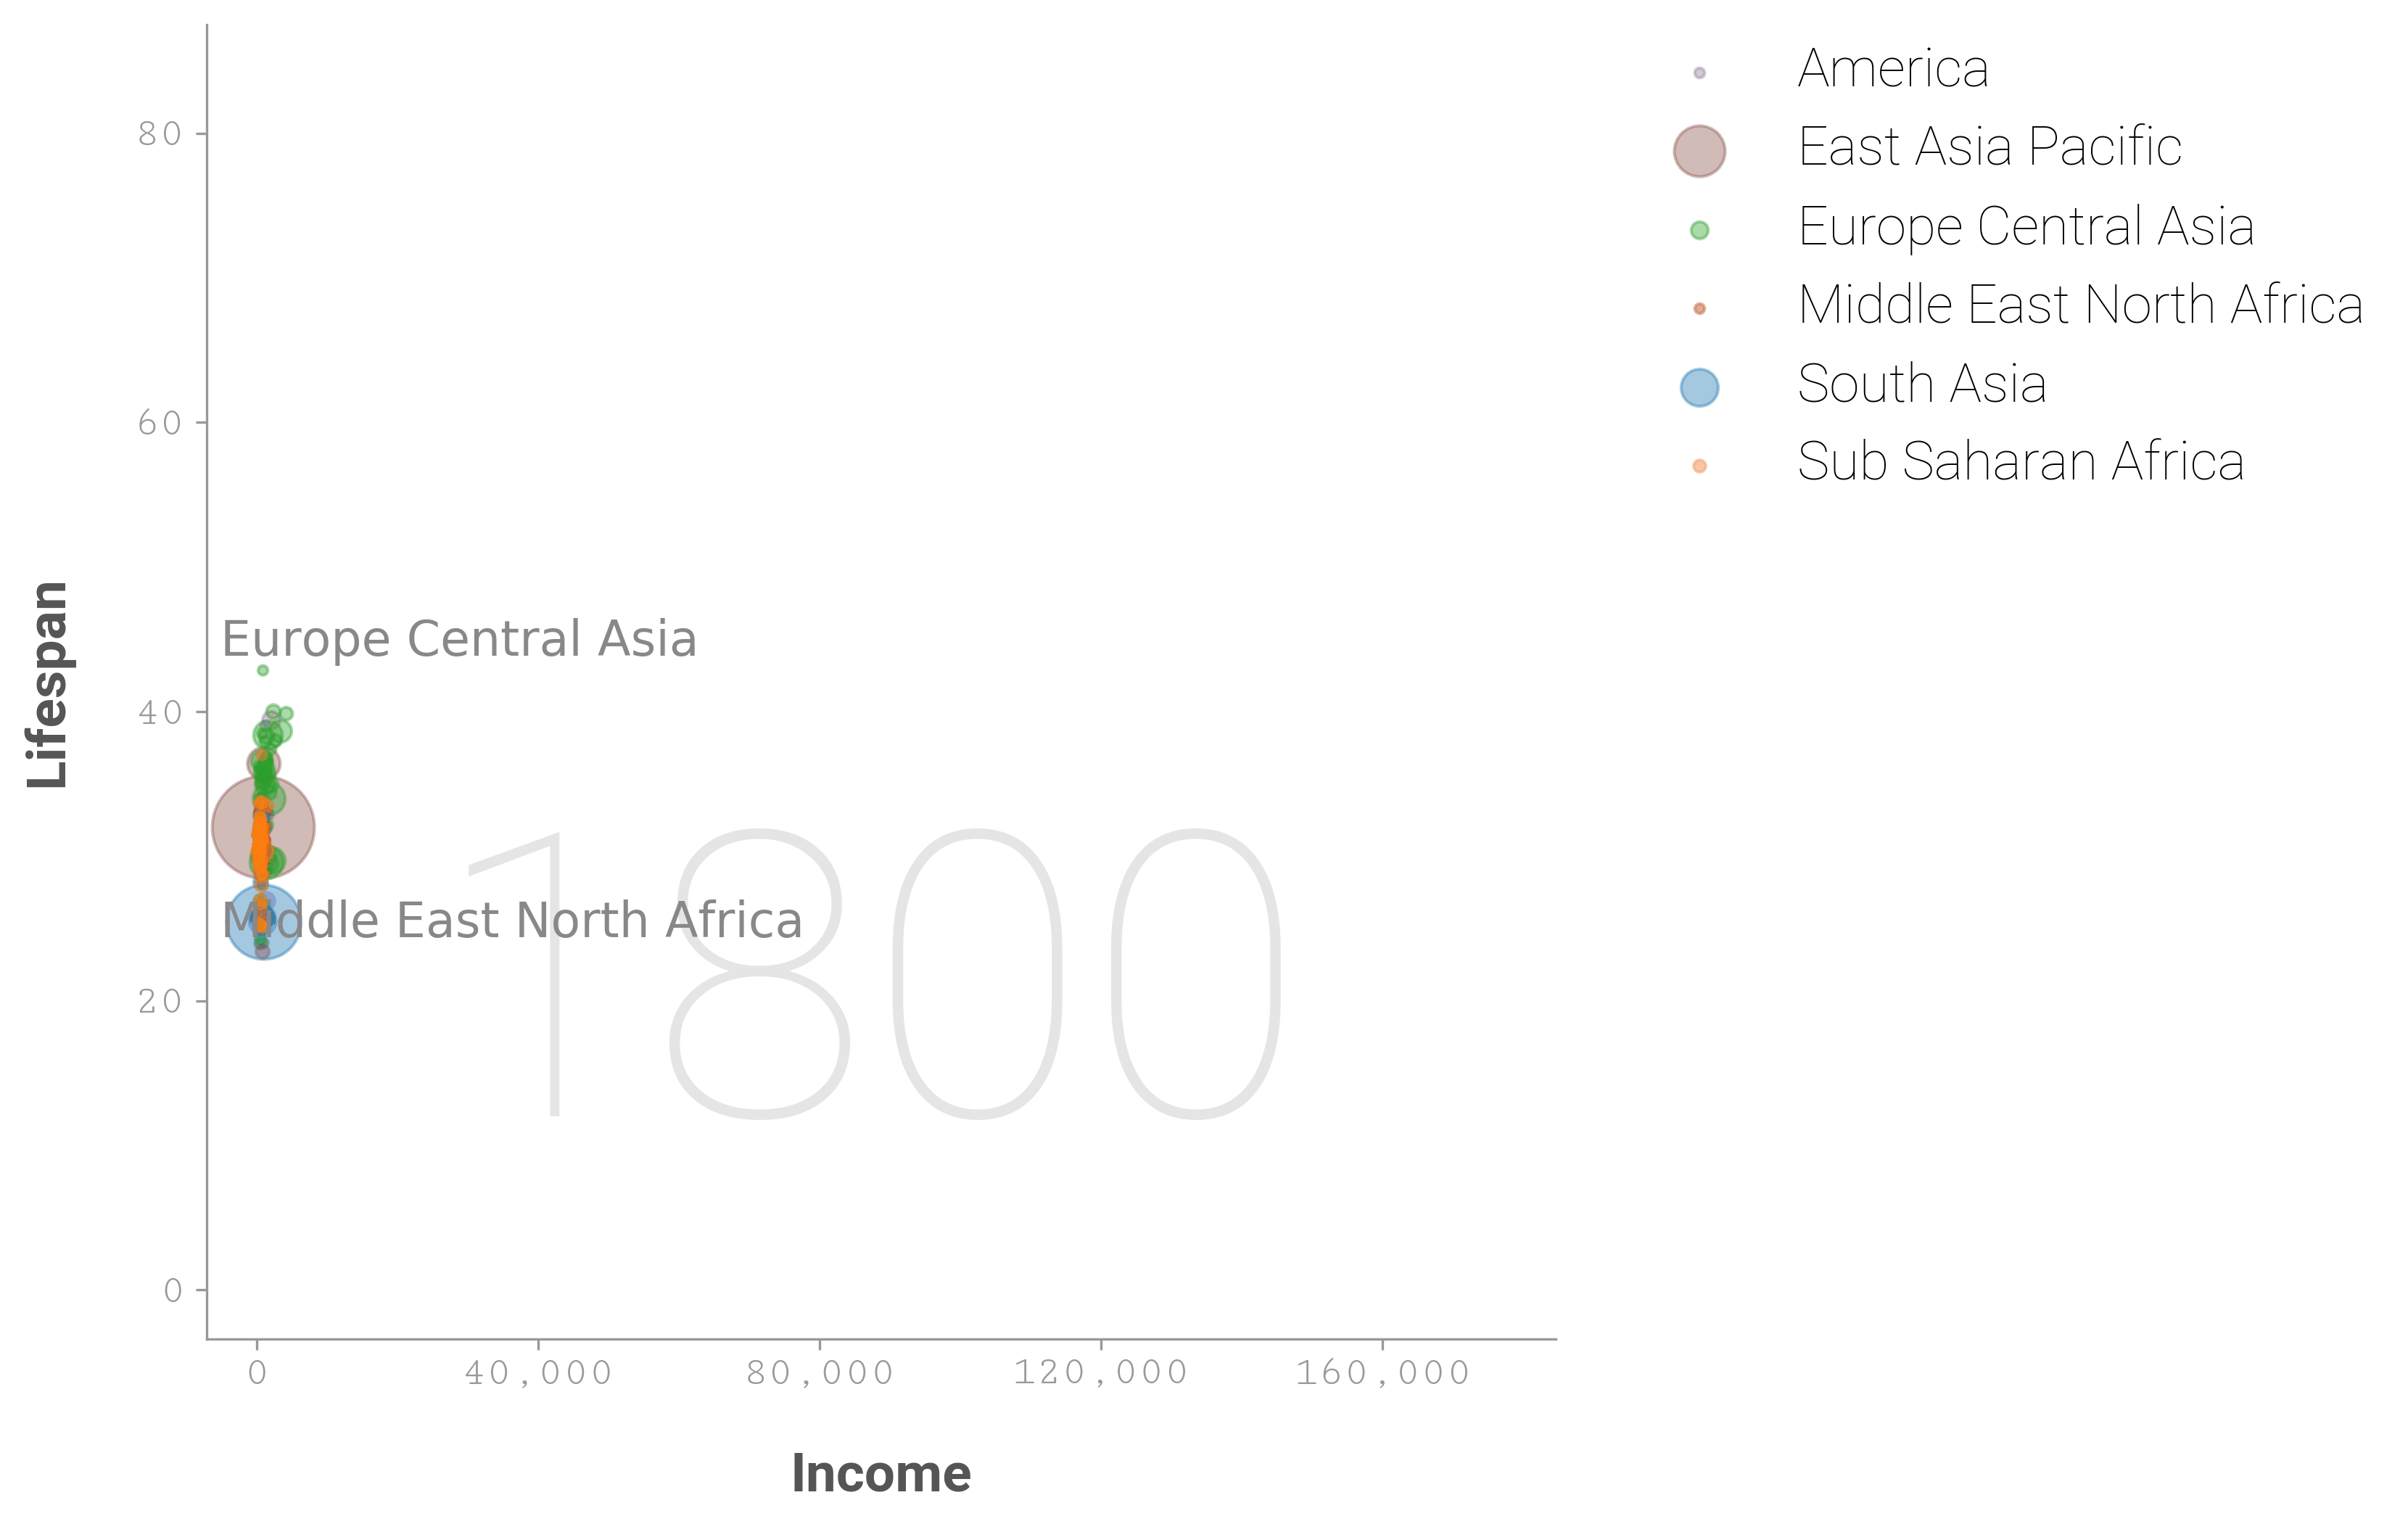

In [0]:
from IPython.display import Image
with open('/content/year_animation.gif','rb') as f:
   display(Image(data=f.read(), format='png', height=800, width=1055))

## Point out a story

# ASSIGNMENT
Replicate the lesson code

# STRETCH OPTIONS

## 1. Animate!
- [Making animations work in Google Colaboratory](https://medium.com/lambda-school-machine-learning/making-animations-work-in-google-colaboratory-new-home-for-ml-prototyping-c6147186ae75)
- [How to Create Animated Graphs in Python](https://towardsdatascience.com/how-to-create-animated-graphs-in-python-bb619cc2dec1)
- [The Ultimate Day of Chicago Bikeshare](https://chrisluedtke.github.io/divvy-data.html) (Lambda School Data Science student)

## 2. Work on anything related to your portfolio site / project